# kuppanmandal@gmail.com

# Exploratory data analysis (EDA) of Haberman's Survival Data Set
Survival of patients who had undergone surgery for breast cancer

# Haberman's Survival Data Set

Link of Data Set: https://www.kaggle.com/gilsousa/habermans-survival-data-set

* About: Data Set collected between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
* Number of Instances: 306
* Number of Attributes: 4 (including the class attribute)
* Attribute Information: 
Age of patient at time of operation (numerical),
Patient's year of operation (year - 1900, numerical),
Number of positive axillary nodes detected (numerical),
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
* Missing Attribute Values: None

Objective: Classify a new patient data as survival status of the 3 classes given the 3 features.

In [1]:
# Importing all the neccessay packages to classify
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb
import warnings 
warnings.filterwarnings("ignore")

In [2]:
'''downlaod haberman.csv from 
https://www.kaggle.com/gilsousa/habermans-survival-data-set
/downloads/habermans-survival-data-set.zip/1'''
#Load haberman.csv into a pandas DataFrame using read_csv().
haberman = pd.read_csv('haberman.csv')

In [3]:
# to list data_points and features/independent_variables
print(haberman.shape)

(306, 4)


In [4]:
# to list independent_variables of datasets
print(haberman.columns)

Index(['patients_age', 'operation_year', 'positive_axillary',
       'survival_status'],
      dtype='object')


In [5]:
# to find data_points for each class to survival
print(haberman["survival_status"].value_counts())
# balanced-dataset vs imbalanced datasets
# haberman is an imbalanced dataset as the number of data points
print("1 = the patient survived 5 years or longer" +
      "\n2 = the patient died within 5 year")

1    225
2     81
Name: survival_status, dtype: int64
1 = the patient survived 5 years or longer
2 = the patient died within 5 year


# 2-D Scatter Plot

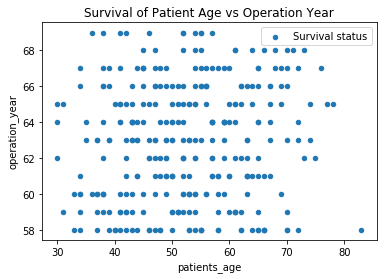

In [6]:
#2-D scatter plot: only able to plot in x and y axis
#2D scatter plot type is used to plot points only in x and y axis
#accessing along with dependent_variable is not possibe

haberman.plot(kind='scatter', x='patients_age', y='operation_year',\
              title='Survival of Patient Age vs Operation Year')
mp.legend(['Survival status'])
mp.show()

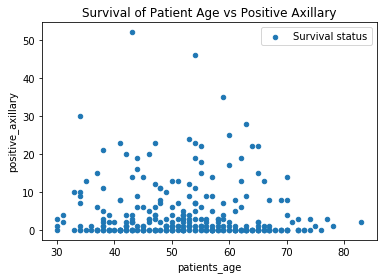

In [7]:
haberman.plot(kind='scatter', x='patients_age', y='positive_axillary',\
              title='Survival of Patient Age vs Positive Axillary')
mp.legend(['Survival status'])
mp.show()

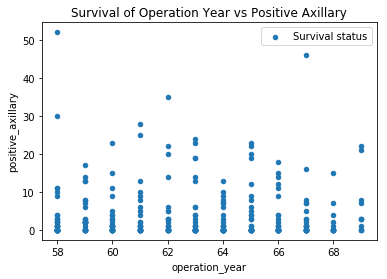

In [8]:
haberman.plot(kind='scatter', x='operation_year', y='positive_axillary',\
              title='Survival of Operation Year vs Positive Axillary')
mp.legend(['Survival status'])
mp.show()

Observations
* From above observations on 2D scatter plot doesnot have clear seperation on data set along with its output
* Use seaborn package to define in a proper way for clear classification for understanding the output classes.

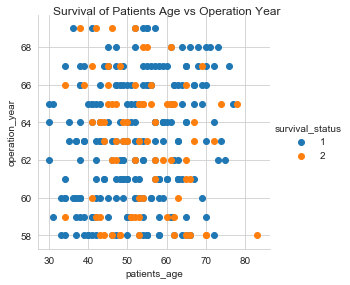

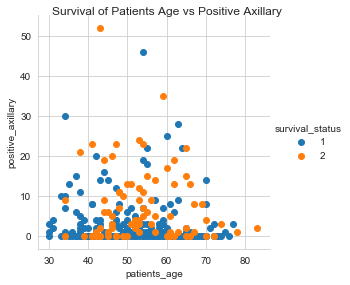

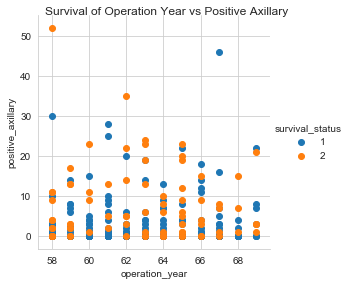

In [9]:
# 2-D Scatter plot with color-coding for survival status
# matplotlib package doesnot provide clear picture of dependent_variables
# in order to avoid that using seaborn package, here 'sb' corresponds to seaborn package.

sb.set_style("whitegrid")
sb.FacetGrid(haberman, hue="survival_status", height=4)\
    .map(mp.scatter, "patients_age", "operation_year").add_legend()
mp.suptitle('Survival of Patients Age vs Operation Year')
sb.FacetGrid(haberman, hue="survival_status", height=4)\
    .map(mp.scatter, "patients_age", "positive_axillary").add_legend()
mp.suptitle('Survival of Patients Age vs Positive Axillary')
sb.FacetGrid(haberman, hue="survival_status", height=4)\
    .map(mp.scatter, "operation_year", "positive_axillary").add_legend()
mp.suptitle('Survival of Operation Year vs Positive Axillary')
mp.show()

Observation(s):
1. Using patients_age and positive_axillary independent_variables, we can observer survival status in an more apporapiate way comare to other pair of independent_variables.
2. Seperating from one other is some what difficult on survival status with all the plots.
3. It seems to be like a probability but with EDA make some more efficent way to classify.

# 3D Scatter plot in Pair plots method
It looks like matrices form of 2D plots

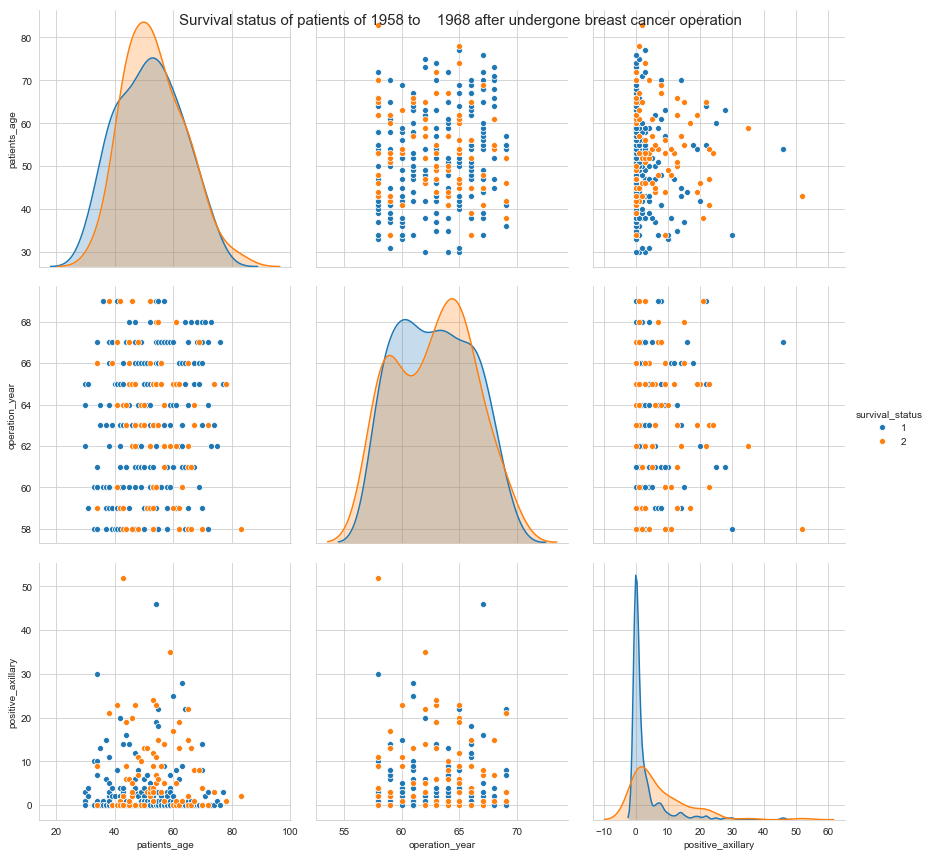

In [10]:
# to close the previous plotted image
mp.close()
# whitegrid style of background in plotting
sb.set_style("whitegrid")
sb.pairplot(haberman, hue='survival_status', \
    vars=['patients_age','operation_year','positive_axillary'], height = 4)
mp.suptitle('Survival status of patients of 1958 to\
    1968 after undergone breast cancer operation', size = 15)
mp.show()

Observations
* From the above observation the 3D plots of data set in 2D pair plots of all possible independent_variables
* On Survival_status is output feature for defining two classes

Keen Observations
1. On 2D plot of patients_age vs operation_year is dynamic in survival status but in all the duration patients age less than 40 has more survival over above 40 age
2. Simillarly patients_age vs positive_axillary also dynamic to segregate but positive axilli nodes of patients age less than 40 has more survival compare to above 40 age

# Histogram with Probability Density Function (PDF)

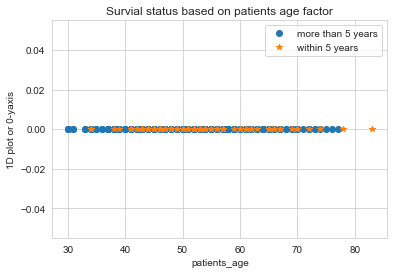

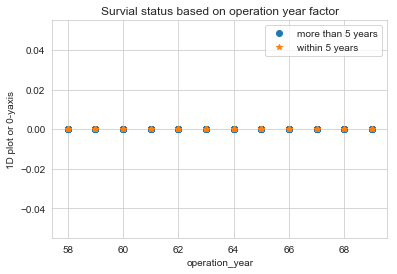

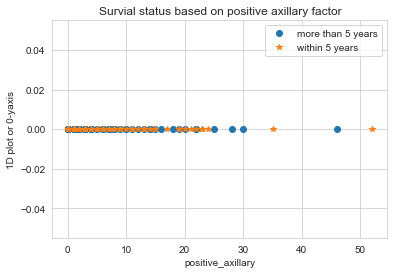

In [11]:
more_5years = haberman.loc[haberman["survival_status"] == 1]
within_5years = haberman.loc[haberman["survival_status"] == 2]
mp.xlabel("patients_age")
mp.ylabel("1D plot or 0-yaxis")
mp.title("Survial status based on patients age factor")
mp.plot(more_5years["patients_age"], \
        np.zeros_like(more_5years['patients_age']), 'o')
mp.plot(within_5years["patients_age"],\
        np.zeros_like(within_5years['patients_age']), '*')
mp.legend(['more than 5 years','within 5 years'])
mp.show()

mp.xlabel("operation_year")
mp.ylabel("1D plot or 0-yaxis")
mp.title("Survial status based on operation year factor")
mp.plot(more_5years["operation_year"],\
        np.zeros_like(more_5years['operation_year']), 'o')
mp.plot(within_5years["operation_year"],\
        np.zeros_like(within_5years['operation_year']), '*')
mp.legend(['more than 5 years','within 5 years'])
mp.show()

mp.xlabel("positive_axillary")
mp.ylabel("1D plot or 0-yaxis")
mp.title("Survial status based on positive axillary factor")
mp.plot(more_5years["positive_axillary"],\
        np.zeros_like(more_5years['positive_axillary']), 'o')
mp.plot(within_5years["positive_axillary"],\
        np.zeros_like(within_5years['positive_axillary']), '*')
mp.legend(['more than 5 years','within 5 years'])
mp.show()

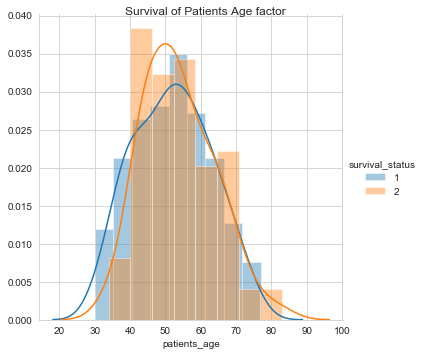

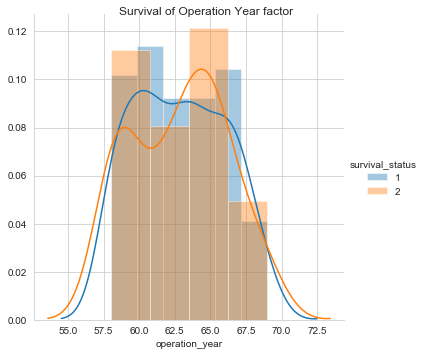

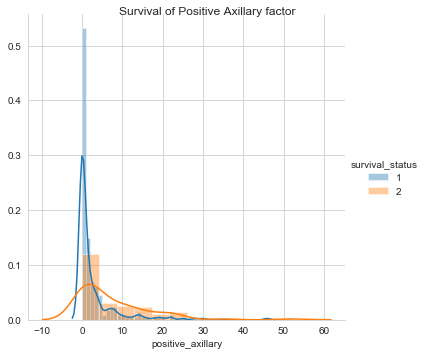

In [12]:
sb.FacetGrid(haberman, hue="survival_status", height=5)\
    .map(sb.distplot, "patients_age").add_legend()
mp.suptitle('Survival of Patients Age factor')
sb.FacetGrid(haberman, hue="survival_status", height=5)\
    .map(sb.distplot, "operation_year").add_legend()
mp.suptitle('Survival of Operation Year factor')
sb.FacetGrid(haberman, hue="survival_status", height=5)\
    .map(sb.distplot, "positive_axillary").add_legend()
mp.suptitle('Survival of Positive Axillary factor')
mp.show()

Observations
* Through the histogram with probability distibution finction make more information about survival_status of 1-survives more than 5 years
* If patients_age has less than 40 years has more survival status of more than 5 years
* Also if positive_axillary values of less than or equal to 2 has more survival status of more than 5 years

# Cumulative Distribution Function (CDF)

Survival Status is more than 5 Years
[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


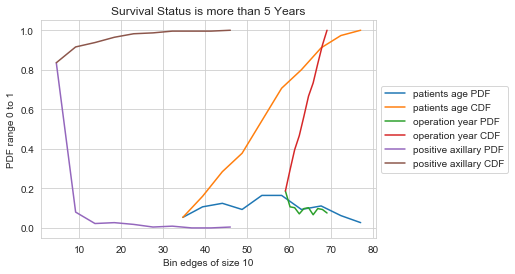


Survival Status is within 5 Years
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


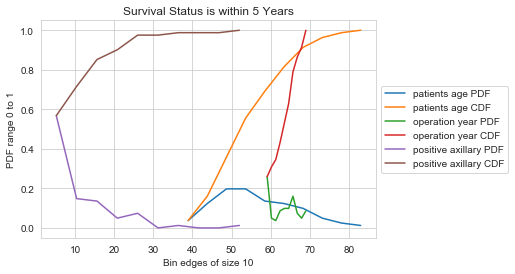

In [13]:
print("Survival Status is more than 5 Years")
counts, bin_edges = np.histogram(more_5years['patients_age'],\
                                 bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
mp.plot(bin_edges[1:], pdf)
mp.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(more_5years['operation_year'],\
                                 bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
mp.plot(bin_edges[1:], pdf)
mp.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(more_5years['positive_axillary'],\
                                 bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
mp.plot(bin_edges[1:], pdf)
mp.plot(bin_edges[1:], cdf)
mp.xlabel('Bin edges of size 10')
mp.ylabel('PDF range 0 to 1')
mp.title('Survival Status is more than 5 Years')
mp.legend(['patients age PDF', 'patients age CDF',\
           'operation year PDF', 'operation year CDF',\
           'positive axillary PDF', 'positive axillary CDF'],\
          loc='center left',bbox_to_anchor=(1, 0.5))
mp.show()

print("\nSurvival Status is within 5 Years")
counts, bin_edges = np.histogram(within_5years['patients_age'],\
                                 bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
mp.plot(bin_edges[1:], pdf)
mp.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(within_5years['operation_year'],\
                                 bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
mp.plot(bin_edges[1:], pdf)
mp.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(within_5years['positive_axillary'],\
                                 bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
mp.plot(bin_edges[1:], pdf)
mp.plot(bin_edges[1:], cdf)
mp.xlabel('Bin edges of size 10')
mp.ylabel('PDF range 0 to 1')
mp.title('Survival Status is within 5 Years')
mp.legend(['patients age PDF', 'patients age CDF',\
           'operation year PDF', 'operation year CDF',\
           'positive axillary PDF', 'positive axillary CDF'],\
           loc='center left',bbox_to_anchor=(1, 0.5))
mp.show()

Observations
* From the above graph upper plots are Cumulative Distribution Function (CDF) ranges from 0 to 1 and lower plots are Probability Density Function (PDF) based on data set
* From Left side.
* 1st is positive_axillary below 10 has 90% survival and above 20 has 90% non-survival
* 2nd is patients_age 90% survival and non-survival attains at 65 age
* 3rd is operation_year year 68 attains 90% survival and year 66 attain 90% non-survival

# Mean

In [14]:
print("Survival Status is more than 5 Years")

print("Mean of Patients Age",np.mean(more_5years["patients_age"]))
print("Mean of Operation Year",np.mean(more_5years["operation_year"]))
print("Mean of Positive Axillary",np.mean(more_5years["positive_axillary"]))

print("\nSurvival Status is within 5 Years")

print("Mean of Patients Age",np.mean(within_5years["patients_age"]))
print("Mean of Operation Year",np.mean(within_5years["operation_year"]))
print("Mean of Positive Axillary",np.mean(within_5years["positive_axillary"]))

Survival Status is more than 5 Years
Mean of Patients Age 52.01777777777778
Mean of Operation Year 62.86222222222222
Mean of Positive Axillary 2.7911111111111113

Survival Status is within 5 Years
Mean of Patients Age 53.67901234567901
Mean of Operation Year 62.82716049382716
Mean of Positive Axillary 7.45679012345679


Observations
* On patients_age and operation_year for both survival status of 1 & 2 categories are almost equal
* On positive_axillary has variation of low means for more survival and high means for less survival

# Standard Deviation

In [15]:
print("Survival Status is more than 5 Years")

print("Standard Deviation of Patients Age",np.std(more_5years["patients_age"]))
print("Standard Deviation of Operation Year",np.std(more_5years["operation_year"]))
print("Standard Deviation of Positive Axillary",np.std(more_5years["positive_axillary"]))

print("\nSurvival Status is within 5 Years")

print("Standard Deviation of Patients Age",np.std(within_5years["patients_age"]))
print("Standard Deviation of Operation Year",np.std(within_5years["operation_year"]))
print("Standard Deviation of Positive Axillary",np.std(within_5years["positive_axillary"]))

Survival Status is more than 5 Years
Standard Deviation of Patients Age 10.98765547510051
Standard Deviation of Operation Year 3.2157452144021956
Standard Deviation of Positive Axillary 5.857258449412131

Survival Status is within 5 Years
Standard Deviation of Patients Age 10.10418219303131
Standard Deviation of Operation Year 3.3214236255207883
Standard Deviation of Positive Axillary 9.128776076761632


Observation
* Similar to Mean, In Standard Deviation also patients_age and operation_year for both survival status of 1 & 2 categories are almost equal
* On positive_axillary has variation of near standard deviation for more survival and far for less survival

# Median

In [16]:
print("Survival Status is more than 5 Years")

print("Median of Patients Age",np.median(more_5years["patients_age"]))
print("Median of Operation Year",np.median(more_5years["operation_year"]))
print("Median of Positive Axillary",np.median(more_5years["positive_axillary"]))

print("\nSurvival Status is within 5 Years")

print("Median of Patients Age",np.median(within_5years["patients_age"]))
print("Median of Operation Year",np.median(within_5years["operation_year"]))
print("Median of Positive Axillary",np.median(within_5years["positive_axillary"]))

Survival Status is more than 5 Years
Median of Patients Age 52.0
Median of Operation Year 63.0
Median of Positive Axillary 0.0

Survival Status is within 5 Years
Median of Patients Age 53.0
Median of Operation Year 63.0
Median of Positive Axillary 4.0


Observation
* In mean and standard deviation of one error value makes much variation. But in this case also identity with previous calculus
* In median of positive axillary has clear distingution

# Percentiles

In [17]:
print("Survival Status is more than 5 Years")

print("90th Percentiles of Patients Age",np.percentile(more_5years["patients_age"],90))
print("90th Percentiles of Operation Year",np.percentile(more_5years["operation_year"],90))
print("90th Percentiles of Positive Axillary",np.percentile(more_5years["positive_axillary"],90))

print("\nSurvival Status is within 5 Years")

print("90th Percentiles of Patients Age",np.percentile(within_5years["patients_age"],90))
print("90th Percentiles of Operation Year",np.percentile(within_5years["operation_year"],90))
print("90th Percentiles of Positive Axillary",np.percentile(within_5years["positive_axillary"],90))

Survival Status is more than 5 Years
90th Percentiles of Patients Age 67.0
90th Percentiles of Operation Year 67.0
90th Percentiles of Positive Axillary 8.0

Survival Status is within 5 Years
90th Percentiles of Patients Age 67.0
90th Percentiles of Operation Year 67.0
90th Percentiles of Positive Axillary 20.0


Observation
* 90th percentiles of both survival status on 1 and 2 has difference only on positive axillary

# Quantiles

In [18]:
print("Survival Status is more than 5 Years")

print("Percentiles of Patients Age",np.percentile(more_5years["patients_age"],\
                                                  np.arange(0, 100, 25)))
print("Percentiles of Operation Year",np.percentile(more_5years["operation_year"],\
                                                    np.arange(0, 100, 25)))
print("Percentiles of Positive Axillary",np.percentile(more_5years["positive_axillary"],\
                                                       np.arange(0, 100, 25)))

print("\nSurvival Status is within 5 Years")

print("Percentiles of Patients Age",np.percentile(within_5years["patients_age"],\
                                                  np.arange(0, 100, 25)))
print("Percentiles of Operation Year",np.percentile(within_5years["operation_year"],\
                                                    np.arange(0, 100, 25)))
print("Percentiles of Positive Axillary",np.percentile(within_5years["positive_axillary"],\
                                                       np.arange(0, 100, 25)))

Survival Status is more than 5 Years
Percentiles of Patients Age [30. 43. 52. 60.]
Percentiles of Operation Year [58. 60. 63. 66.]
Percentiles of Positive Axillary [0. 0. 0. 3.]

Survival Status is within 5 Years
Percentiles of Patients Age [34. 46. 53. 61.]
Percentiles of Operation Year [58. 59. 63. 65.]
Percentiles of Positive Axillary [ 0.  1.  4. 11.]


Observation
* Survival status of quantiles of 0th, 25th, 50th & 75th for long and short life duration has much difference on positive axillary only makes more sence on data for prediction of future occurance

# Median Absolute Deviation 

In [19]:
from statsmodels import robust
print("Median Asolute Deviation (MAD)")

print("Survival Status is more than 5 Years")

print("MAD of Patients Age",robust.mad(more_5years["patients_age"]))
print("MAD of Operation Year",robust.mad(more_5years["operation_year"]))
print("MAD of Positive Axillary",robust.mad(more_5years["positive_axillary"]))

print("\nSurvival Status is within 5 Years")

print("MAD of Patients Age",robust.mad(within_5years["patients_age"]))
print("MAD of Operation Year",robust.mad(within_5years["operation_year"]))
print("MAD of Positive Axillary",robust.mad(within_5years["positive_axillary"]))

Median Asolute Deviation (MAD)
Survival Status is more than 5 Years
MAD of Patients Age 13.343419966550417
MAD of Operation Year 4.447806655516806
MAD of Positive Axillary 0.0

Survival Status is within 5 Years
MAD of Patients Age 11.860817748044816
MAD of Operation Year 4.447806655516806
MAD of Positive Axillary 5.930408874022408


Observation
* From Median Absolute Deviation (MAD) gave data analysis of patients_age and positive_axillary data set alows to apply algorithm for new data prediction

# Box plot and Whiskers

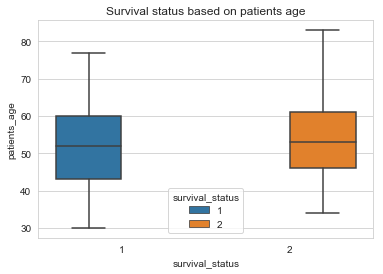

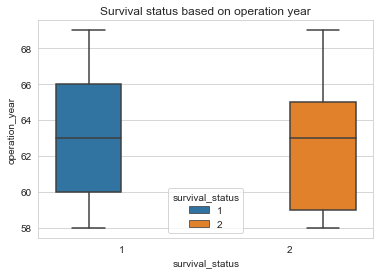

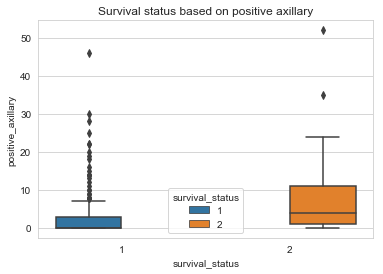

In [20]:
sb.boxplot(x='survival_status',y='patients_age', data=haberman, hue="survival_status")
mp.title("Survival status based on patients age")
mp.show()
sb.boxplot(x='survival_status',y='operation_year', data=haberman, hue="survival_status")
mp.title("Survival status based on operation year")
mp.show()
sb.boxplot(x='survival_status',y='positive_axillary', data=haberman, hue="survival_status")
mp.title("Survival status based on positive axillary")
mp.show()

Observation
* Box plot and Whiskers graph shows to analysis the data set for Survival status for more than 5 years
1. Low positive_axillary
2. Recent operation_year
3. Less patients_age

# Violin plots

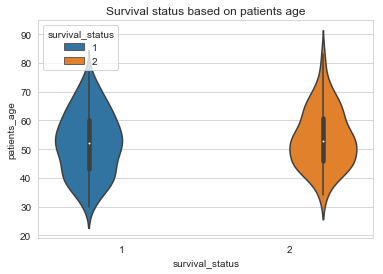

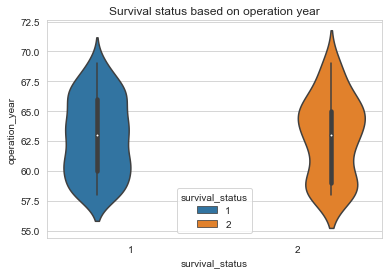

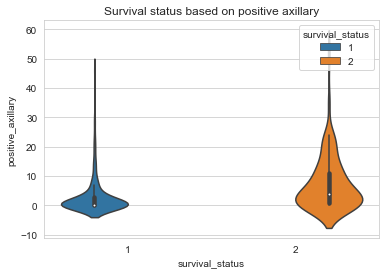

In [21]:
sb.violinplot(x="survival_status", y="patients_age", data=haberman, hue="survival_status", height=5)
mp.title("Survival status based on patients age")
mp.show()
sb.violinplot(x="survival_status", y="operation_year", data=haberman, hue="survival_status", height=5)
mp.title("Survival status based on operation year")
mp.show()
sb.violinplot(x="survival_status", y="positive_axillary", data=haberman, hue="survival_status", height=5)
mp.title("Survival status based on positive axillary")
mp.show()

Observation
* From graph 1: When patients_age increses survival rate increases later on survival rate decreases
* From graph 2: Low counts of positive axillary has more survival rate

# Multivariate probability density, contour plot

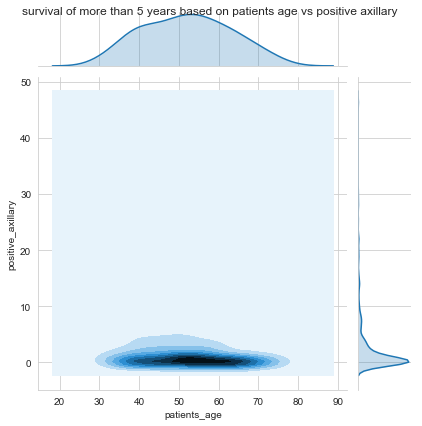

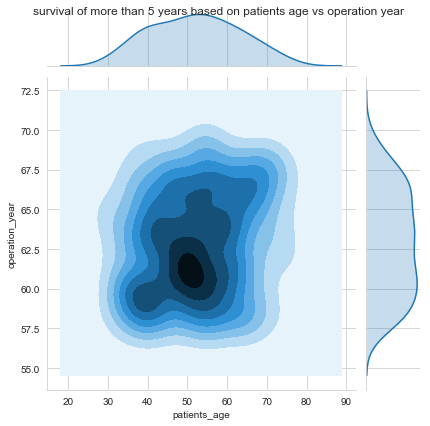

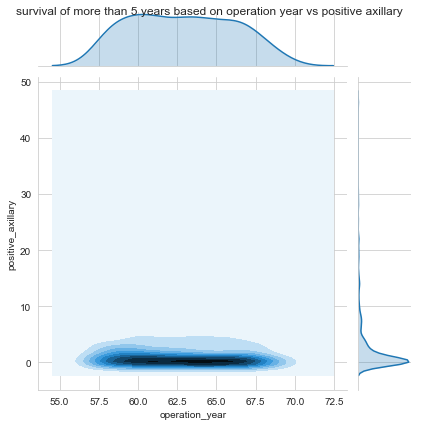

In [22]:
sb.jointplot(x="patients_age", y="positive_axillary", data=more_5years, kind="kde")
mp.suptitle("survival of more than 5 years based on patients age vs positive axillary")
sb.jointplot(x="patients_age", y="operation_year", data=more_5years, kind="kde")
mp.suptitle("survival of more than 5 years based on patients age vs operation year")
sb.jointplot(x="operation_year", y="positive_axillary", data=more_5years, kind="kde")
mp.suptitle("survival of more than 5 years based on operation year vs positive axillary")
mp.show()

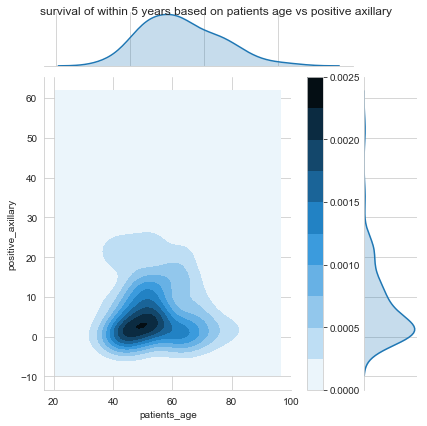

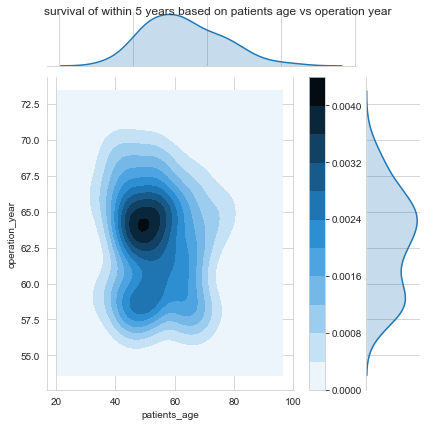

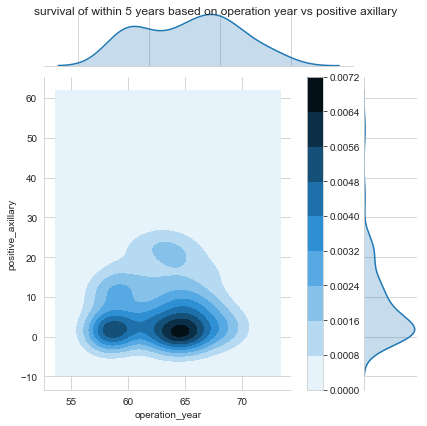

In [23]:
# if required use "cbar = True" for display colorbar in the plot
sb.jointplot(x="patients_age", y="positive_axillary", data=within_5years, kind="kde", cbar = True)
mp.suptitle("survival of within 5 years based on patients age vs positive axillary")
sb.jointplot(x="patients_age", y="operation_year", data=within_5years, kind="kde", cbar = True)
mp.suptitle("survival of within 5 years based on patients age vs operation year")
sb.jointplot(x="operation_year", y="positive_axillary", data=within_5years, kind="kde", cbar = True)
mp.suptitle("survival of within 5 years based on operation year vs positive axillary")
mp.show()

Observations
* """"""""""Survival Status is more than 5 Years""""""""""
* Contour Plot 1: patients_age (between 50 to 60) vs positive_axillary (on 0)
* Contour Plot 2: patients_age (between 45 to 55) vs operation_year (between 60 to 62)
* Contour Plot 3: operation_year (between 60 to 66) vs positive_axillary (on 0)
* """"""""""Survival Status is within 5 Years""""""""""
* Contour Plot 4: patients_age (between 45 to 55) vs positive_axillary (between 0 to 5)
* Contour Plot 5: patients_age (between 45 to 55) vs operation_year (between 62 to 65)
* Contour Plot 6: operation_year (between 63 to 66) vs positive_axillary (between 0 to 5)

# Conclusion
From the over all Exploratory data analysis (EDA) of Haberman's Survival Data Set

Classification of survival status more than 5 years required following
* Age less than 40 
* Age for more survival between 40 to 60 with Positive axillary of 0
* Positive axillary values should lies within 0 to 2

Classification of survival status within 5 years follows

* Age more than 40
* Age for less survival above 45 with Positive axillary above 3
* Positive axillary values above 2